# Find ambiguous entities in Twitter Maria data
In which we look for ambiguous entities in the ~combined~ data for Hurricane Maria.

In [19]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.tokenize.casual import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import codecs
from langid import classify

## Load data

In [23]:
combined_maria = pd.read_csv('../../data/mined_tweets/maria_combined.tsv', sep='\t', index_col=None)
tokenizer = TweetTokenizer()
combined_maria_txt = combined_maria.loc[:, 'text'].dropna(inplace=False).apply(lambda x: ' '.join(tokenizer.tokenize(x.strip())))
# get languages
combined_maria_lang = combined_maria_txt.apply(lambda x: classify(x)[0])
# get spanish only
combined_maria_spanish_txt = combined_maria_txt[combined_maria_lang == 'es']

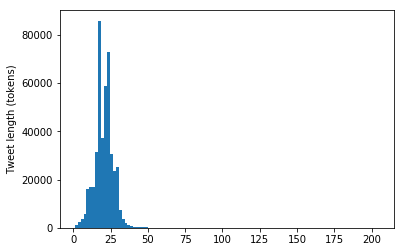

In [24]:
tweet_token_lengths = combined_maria_txt.apply(lambda x: len(tokenizer.tokenize(x)))
plt.hist(tweet_token_lengths, bins=tweet_token_lengths.nunique())
plt.ylabel('Tweet length (tokens)')
plt.show()

TODO: If memory is an issue, write only the short stuff to file?

In [25]:
with codecs.open('../../data/mined_tweets/maria_combined_tweets_es.txt', 'w', encoding='utf-8') as out_file:
    for l in combined_maria_spanish_txt:
        out_file.write('%s\n'%(l))

Run tagger on raw text:

    bash tag_spanish_txt.sh

In [ ]:
combined_maria_tag_tagged = [l.strip() for l in open('../../data/mined_tweets/maria_combined_tweets_ner.txt')]

In [14]:
print(combined_maria_txt.values.tolist()[:10])

[u'Every time he speaks it shows how stupid he is & how little he cares . #45 needs to chat with PR about expense of #Maria . I mean really ?', u'#HurricaneIrma & #HurricaneMaria : Emergency comms equipment has already been pushed down range and more on the way . https :/ / m.facebook.com/story.php?stor y_fbid = 10155798796 154711 & id = 4819654471 0 \u2026', u'Our country will rebuild as soon as the government stops being cute for the press & actually helps my people . #HurricaneMaria', u'An urgent interview with @marisollebron - - discussing the multiple layers of violence of #HurricaneMaria including coerced migration . https :/ / twitter.com/jacobinmag/sta tus / 9138586147 3291468 9 \u2026', u"Kanye : Bush doesn't care about black people Me : Rosello doesn't care about poor people #HurricaneMaria #PrayForPuertoRico", u'would be of for rebuild over and over , #MoveTheLineBack #HurricaneIrma #Redevastation #HurricaneMaria #GlobalWarming #FireRyan', u'Same in the #USVI but no one is r

In [27]:
ngram_range = (1,5)
maria_docs = combined_maria_spanish_txt.values.tolist()
cv = CountVectorizer(min_df=1, tokenizer=tokenizer.tokenize, ngram_range=ngram_range)
dtm = cv.fit_transform(maria_docs)

## Compare with Wiki lexicon

In [28]:
from bz2 import BZ2File
lexicon_file = '/hg190/corpora/crosswikis-data.tar.bz2/string_mention_counts.bz2'
lexicon_dict_file = '/hg190/corpora/crosswikis-data.tar.bz2/dictionary.bz2'

In [29]:
def get_lexicon_wiki_pair(l_split):
    pair = (l_split[0], l_split[1].split(' ')[1])
    return pair
lexicon_pairs = []
for i, l in enumerate(BZ2File(lexicon_dict_file, 'r')):
    l_split = l.split('\t')
    if(len(l_split) > 1 and l_split[0] != ''):
        lexicon_pair = get_lexicon_wiki_pair(l_split)
        lexicon_pairs.append(lexicon_pair)
        if(i % 1000000 == 0):
            print('processed %d anchor pairs'%(i))
# lexicon_pairs = [get_lexicon_wiki_pair(l) for l in BZ2File(lexicon_dict_file, 'r') if len(l.split('\t')) > 1 and l.split('\t')[0] != '']
print('%d anchor pairs collected'%(len(lexicon_pairs)))

processed 1000000 anchor pairs
processed 2000000 anchor pairs
processed 3000000 anchor pairs
processed 4000000 anchor pairs
processed 5000000 anchor pairs
processed 6000000 anchor pairs
processed 7000000 anchor pairs
processed 8000000 anchor pairs
processed 9000000 anchor pairs
processed 10000000 anchor pairs
processed 11000000 anchor pairs
processed 12000000 anchor pairs
processed 13000000 anchor pairs
processed 14000000 anchor pairs
processed 15000000 anchor pairs
processed 16000000 anchor pairs
processed 17000000 anchor pairs
processed 18000000 anchor pairs
processed 19000000 anchor pairs
processed 20000000 anchor pairs
processed 21000000 anchor pairs
processed 22000000 anchor pairs
processed 23000000 anchor pairs
processed 24000000 anchor pairs
processed 25000000 anchor pairs
processed 26000000 anchor pairs
processed 27000000 anchor pairs
processed 28000000 anchor pairs
processed 29000000 anchor pairs
processed 30000000 anchor pairs
processed 31000000 anchor pairs
processed 3200000